<a href="https://colab.research.google.com/github/skyler14/ICIAR-histology/blob/master/Edge%20and%20Cell%20Dection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snippets, edge detection

This is a collection of a variety of 

(250, 722)
3


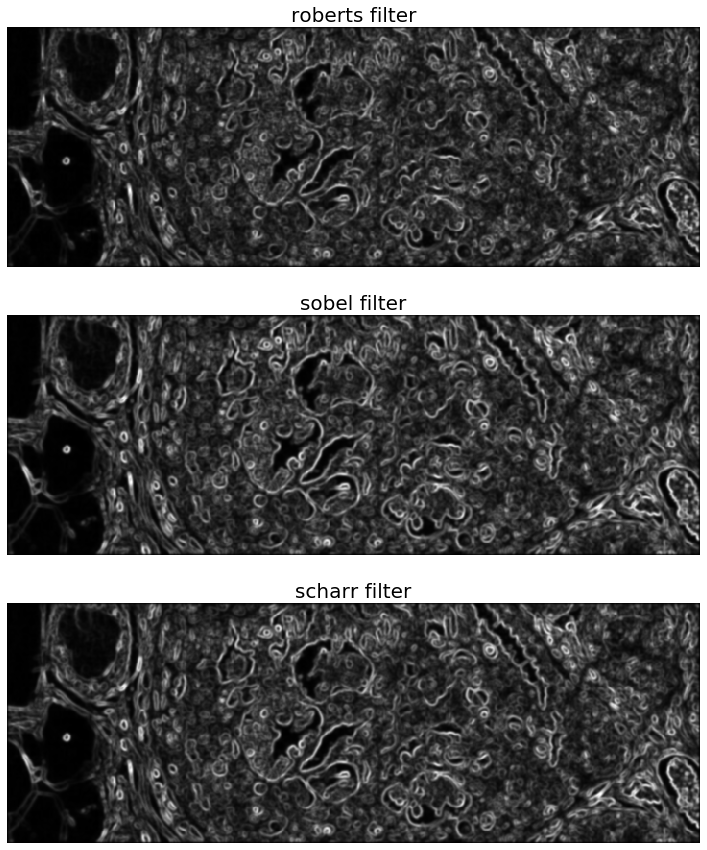

In [6]:
# reference code from local computations
# !pip install scikit-image

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from PIL import Image
import requests
from io import BytesIO

from skimage import feature
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h, frangi, gabor, gaussian, hessian, laplace, meijering, wiener

def edge_transformer(img,alg=gaussian):
    return(alg(img))

#farid_v, farid_h, \
req = requests.get('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
img = Image.open(BytesIO(req.content)).convert('L')

# im = ndi.rotate(im, 15, mode='constant')
# im = ndi.gaussian_filter(im, 4)
# im += 0.2 * np.random.random(im.shape)

im = np.array(img)
print(im.shape)

edges1 = sobel(im)
# edges2 = scharr(im)

edges = [roberts, sobel, scharr] #, sobel_h, sobel_v,  
    # prewitt, #scharr_h, scharr_v, prewitt_v, prewitt_h, farid_v, farid_h,
        # gaussian, laplace, meijering]

analysis = [edge_transformer(im,edges[i]) for i,_ in enumerate(edges)]
print(len(analysis))  
  
ax=[0 for i in range(len(edges))]

# display results__
fig, (ax) = plt.subplots(nrows=(len(ax)), ncols=1, figsize=(15, 15),
                                    sharex=True, sharey=True)

# ax1.imshow(im, cmap=plt.cm.gray)
# ax1.axis('off')
# ax1.set_title('noisy image', fontsize=20)

for i,a in enumerate(ax):
    a.imshow(edge_transformer(analysis[i]), cmap=plt.cm.gray)
    a.axis('off')
    a.set_title(edges[i].__name__+" filter", fontsize=20)

# ax3.imshow(edges2, cmap=plt.cm.gray)
# ax3.axis('off')
# ax3.set_title('Canny filter, $\sigma=5$', fontsize=20)

# mod_img=img
# mod_img.putlpha(edges1)
# ax4.imshow(mod_img, cmap=plTypeError: 'function' object is not subscriptablet.cm.gray)
# ax4.axis('off')
# ax4.set_title('Canny filter, $\sigma=5$', fontsize=20)

plt.show()


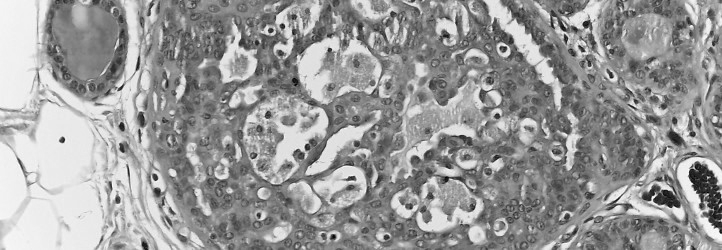

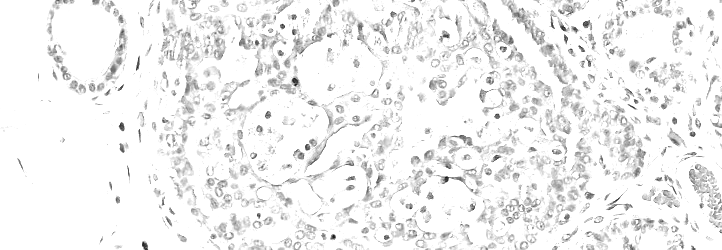

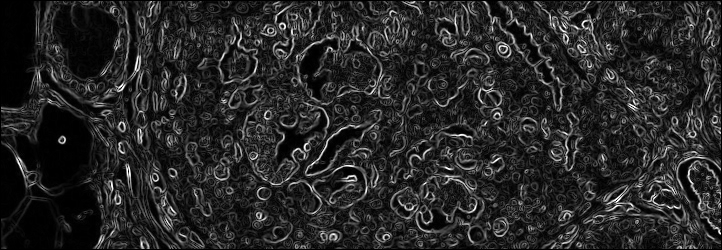

In [5]:
import cv2
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h, frangi, gabor, gaussian, hessian, laplace, meijering, wiener
from google.colab.patches import cv2_imshow
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

def edge_transformer(img,alg=gaussian):
    return(alg(img))

req = urllib.request.urlopen('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# arr = np.asarray(bytearray(analysis[2]), dtype=np.uint8)
# print(arr)
img = cv2.imdecode(arr, -1)
img2=img.copy()
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
    # draw the outer circle
    # cv2.circle(img2,(i[0],i[1]),i[2],(0,128,0),1)
    # draw the center of the circle
    # cv2.circle(cimg,(i[0],i[1]),2,(0,0,0),3)


cv2_imshow(img[:,:,1])
# clean_im=np.array(edge_transformer(img[:,:,2],scharr))
testim=edge_transformer(img[:,:,0])*img[:,:,1]+img[:,:,2]
cv2_imshow(testim)
# print(np.array_str(np.(testim,255), precision=2))
testim=edge_transformer(testim,scharr)
cv2_imshow(testim)


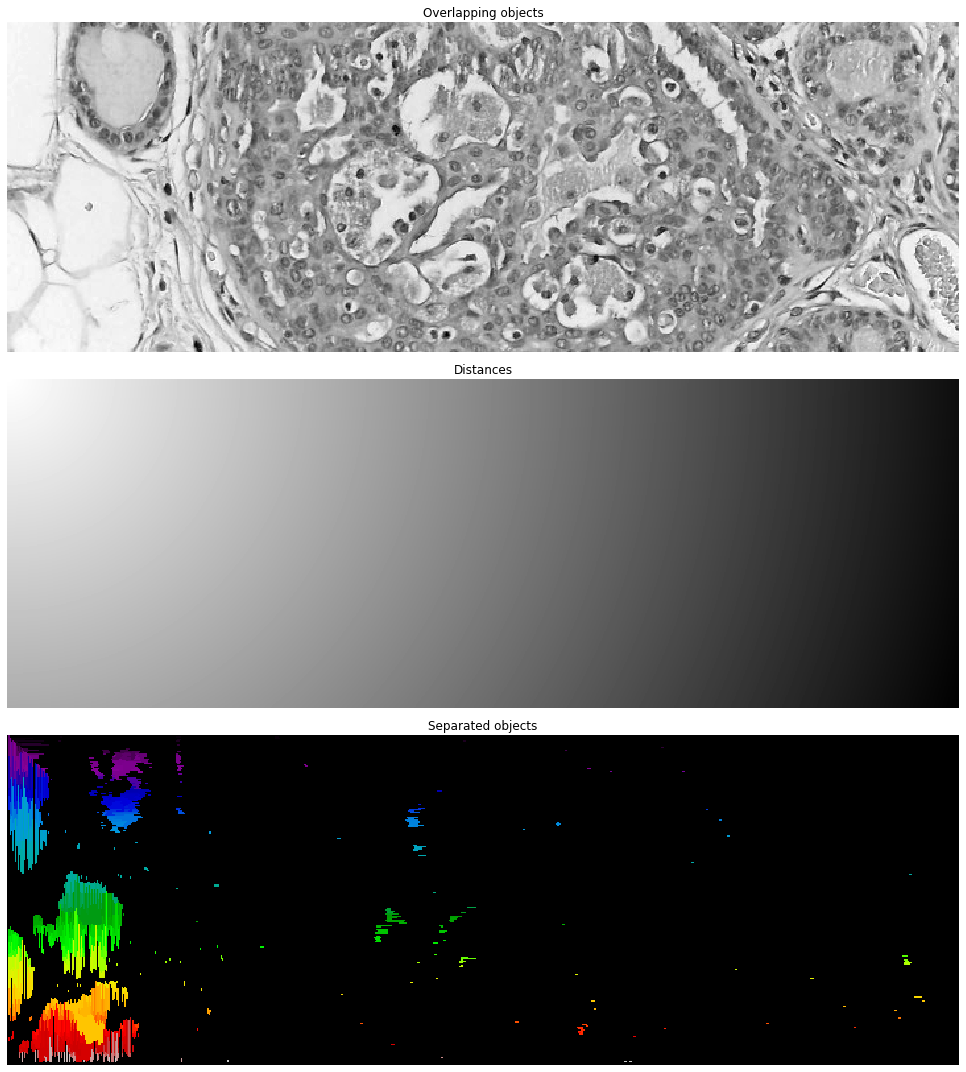

In [23]:
# watershed segmentation

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
req = requests.get('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
image = np.array(Image.open(BytesIO(req.content)))[:,:,0]

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(nrows=3, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [0]:
# This is attempts to work with OpenCV

None


In [2]:
# check for gpu 

import cv2

# print(cv2.getBuildInformation())
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# arr = np.asarray(bytearray(analysis[2]), dtype=np.uint8)
# print(arr)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
# cimg=cv2.convertScaleAbs(img,)
cimg = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
# cimg = cv2.cvtColor(np.array(img), cv2.COLOR_GRAY2BGR)
cimg = cv2.medianBlur(cimg,3)
# simgy=cv2.Scharr(cimg,cv2.CV_64F,0,1)
# simgx=cv2.Scharr(cimg,cv2.CV_64F,1,0)
# simg=(simgx+simgy)/2
# cv2_imshow(simg)
# cv2_imshow(simg)
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1,5,param1=1,param2=50,minRadius=1,maxRadius=100)
# cv2_imshow(img)
# if cv2.waitKey() & 0xff == 27: quit()


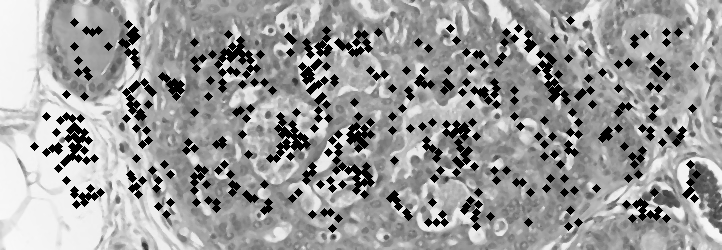

In [13]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    # cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
# this didnt do very well

In [19]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

req = urllib.request.urlopen('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
image_rgb = np.asarray(bytearray(req.read()), dtype=np.uint8)
# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=1, max_size=20)
result.sort(order='accumulator')
print(result)
# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
testimb = color.gray2rgb(img_as_ubyte(testim))
testimb[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(testim)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(testimb)

plt.show()

[]


IndexError: ignored

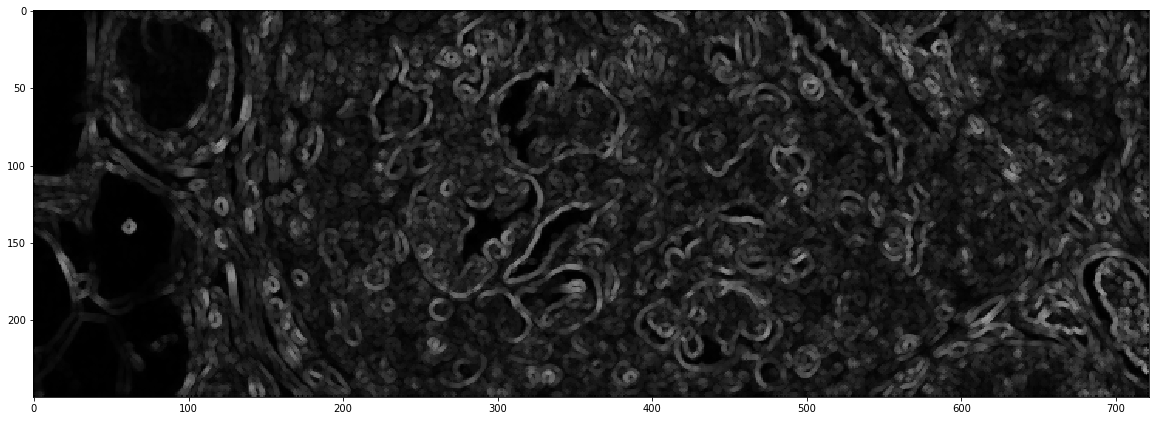

In [0]:
# hough transform through skimage
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.morphology import dilation
from skimage.morphology import square

# Load picture and detect edges
# image = img_as_ubyte(data.coins()[160:230, 70:270])
# edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(2, 10, 1)
hough_res = hough_circle(analysis[1], hough_radii)

# Select the most prominent n circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=400)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
image = color.gray2rgb(analysis[2])
# for center_y, center_x, radius in zip(cy, cx, radii):
#     circy, circx = circle_perimeter(center_y, center_x, radius,
#                                     shape=image.shape)
#     image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)

image=dilation(image)

ax.imshow(image, cmap=plt.cm.gray)


In [5]:
from skimage.filters import try_all_threshold

img = analysis[2]

fig, ax = try_all_threshold(img, figsize=(40, 40), verbose=False)
plt.show()


NameError: ignored

(438, 584)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


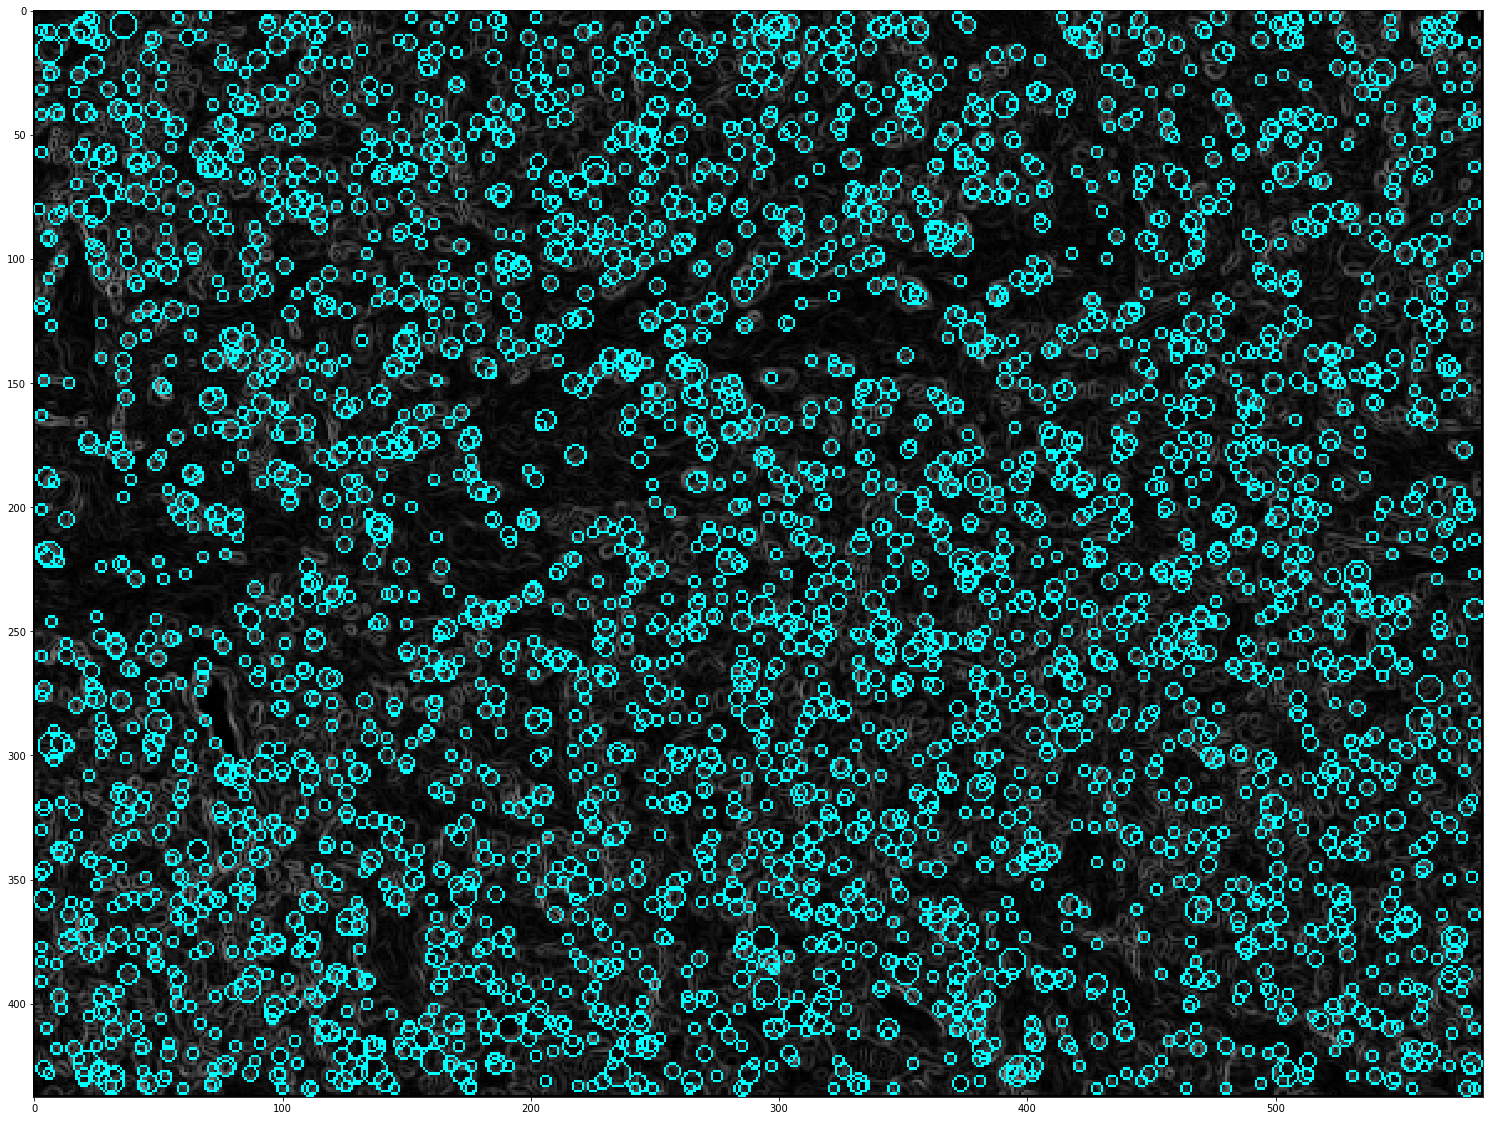

In [8]:
# reference code from local computations
# !pip install scikit-image

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from PIL import Image
import requests
from io import BytesIO

from skimage import feature
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h, frangi, gabor, gaussian, hessian, laplace, meijering, wiener

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

def edge_transformer(img,alg=gaussian):
    return(alg(img))

#farid_v, farid_h, \
req = requests.get('https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Finvasive.png%2F&f=1&nofb=1')
# https://i.stack.imgur.com/Ye3gs.png
# https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Fin_situ.png%2F&f=1&nofb=1
# https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ficiar2018-challenge.grand-challenge.org%2Fmedia%2FICIAR2018-Challenge%2Fpublic_html%2Fbenign.png%2F&f=1&nofb=1
img = Image.open(BytesIO(req.content)).convert('L')

# im = ndi.rotate(im, 15, mode='constant')
# im = ndi.gaussian_filter(im, 4)
# im += 0.2 * np.random.random(im.shape)

im = np.array(img)
print(im.shape)

edges1 = sobel(im)
# edges2 = scharr(im)

edges = [roberts, sobel, scharr] #, sobel_h, sobel_v,  
    # prewitt, #scharr_h, scharr_v, prewitt_v, prewitt_h, farid_v, farid_h,
        # gaussian, laplace, meijering]

analysis = [edge_transformer(im,edges[i]) for i,_ in enumerate(edges)]
# print(len(analysis))  


ax=[0 for i in range(len(edges))]

# display results__
# fig, (ax) = plt.subplots(nrows=(len(ax)), ncols=1, figsize=(15, 15),
#                                     sharex=True, sharey=True)

# ax1.imshow(im, cmap=plt.cm.gray)
# ax1.axis('off')
# ax1.set_title('noisy image', fontsize=20)

# Load picture and detect edges
# image = img_as_ubyte(data.coins()[160:230, 70:270])
# edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
# image=dilation(analysis[2])
image=analysis[2]
hough_radii = np.arange(2, 6, 1)
hough_res = hough_circle(canny(image), hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,min_xdistance=5,min_ydistance=5,
                                           total_num_peaks=3000)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(50, 20))
image = color.gray2rgb(analysis[1])
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (0, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
# ax.imshow(image, cmap=plt.cm.gray)

# for i,a in enumerate(ax):
#     a.imshow(edge_transformer(analysis[i]), cmap=plt.cm.gray)
#     a.axis('off')
#     a.set_title(edges[i].__name__+" filter", fontsize=20)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


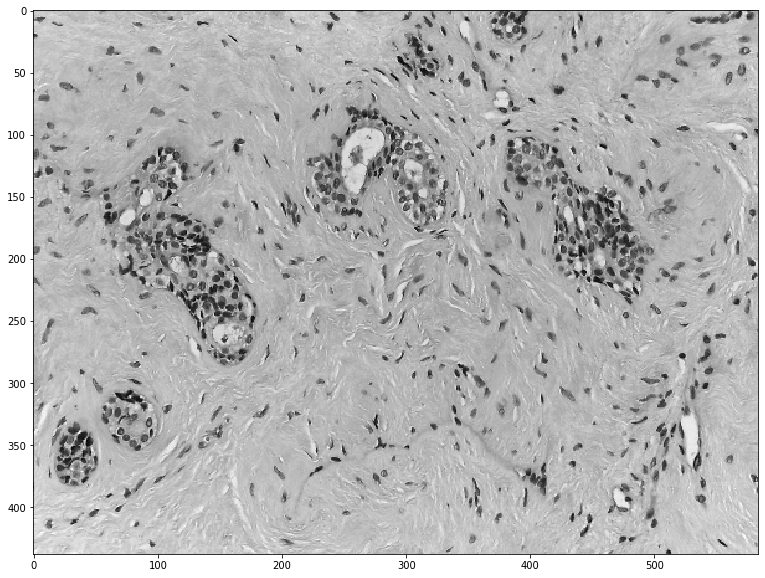

In [0]:
from skimage import exposure
from skimage import data, img_as_float

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img_as_float(analysis[2]/255), clip_limit=0.01)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40, 10))
# ax.imshow(img_adapteq, cmap=plt.cm.gray)
# ax.imshow(img_adapteq, cmap=plt.cm.gray)
ax.imshow(im, cmap=plt.cm.gray)


In [0]:
import numpy as np
import cv2

req = requests.get('http://www.i3s.up.pt/digitalpathology/index_files/image001.jpg')
image_ori  = np.array(Image.open(BytesIO(req.content)).convert('L'))
# image_ori = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

lower_bound = np.array([0,0,10])
upper_bound = np.array([255,255,195])

image_color = np.array(Image.open(BytesIO(req.content)))
image = image_color

mask = cv2.inRange(image_color, lower_bound, upper_bound)

# mask = cv2.adaptiveThreshold(image_ori,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY_INV,33,2)

kernel = np.ones((3, 3), np.uint8)

#Use erosion and dilation combination to eliminate false positives. 
#In this case the text Q0X could be identified as circles but it is not.
mask = cv2.erode(mask, kernel, iterations=6)
mask = cv2.dilate(mask, kernel, iterations=3)

closing = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
contours.sort(key=lambda x:cv2.boundingRect(x)[0])

array = []
ii = 1
print(len(contours))
for c in contours:
    (x,y),r = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    r = int(r)
    if r >= 6 and r<=10:
        cv2.circle(image,center,r,(0,255,0),2)
        array.append(center)

cv2.imshow("preprocessed", image_color)
cv2.waitKey(0)


NameError: ignored

84


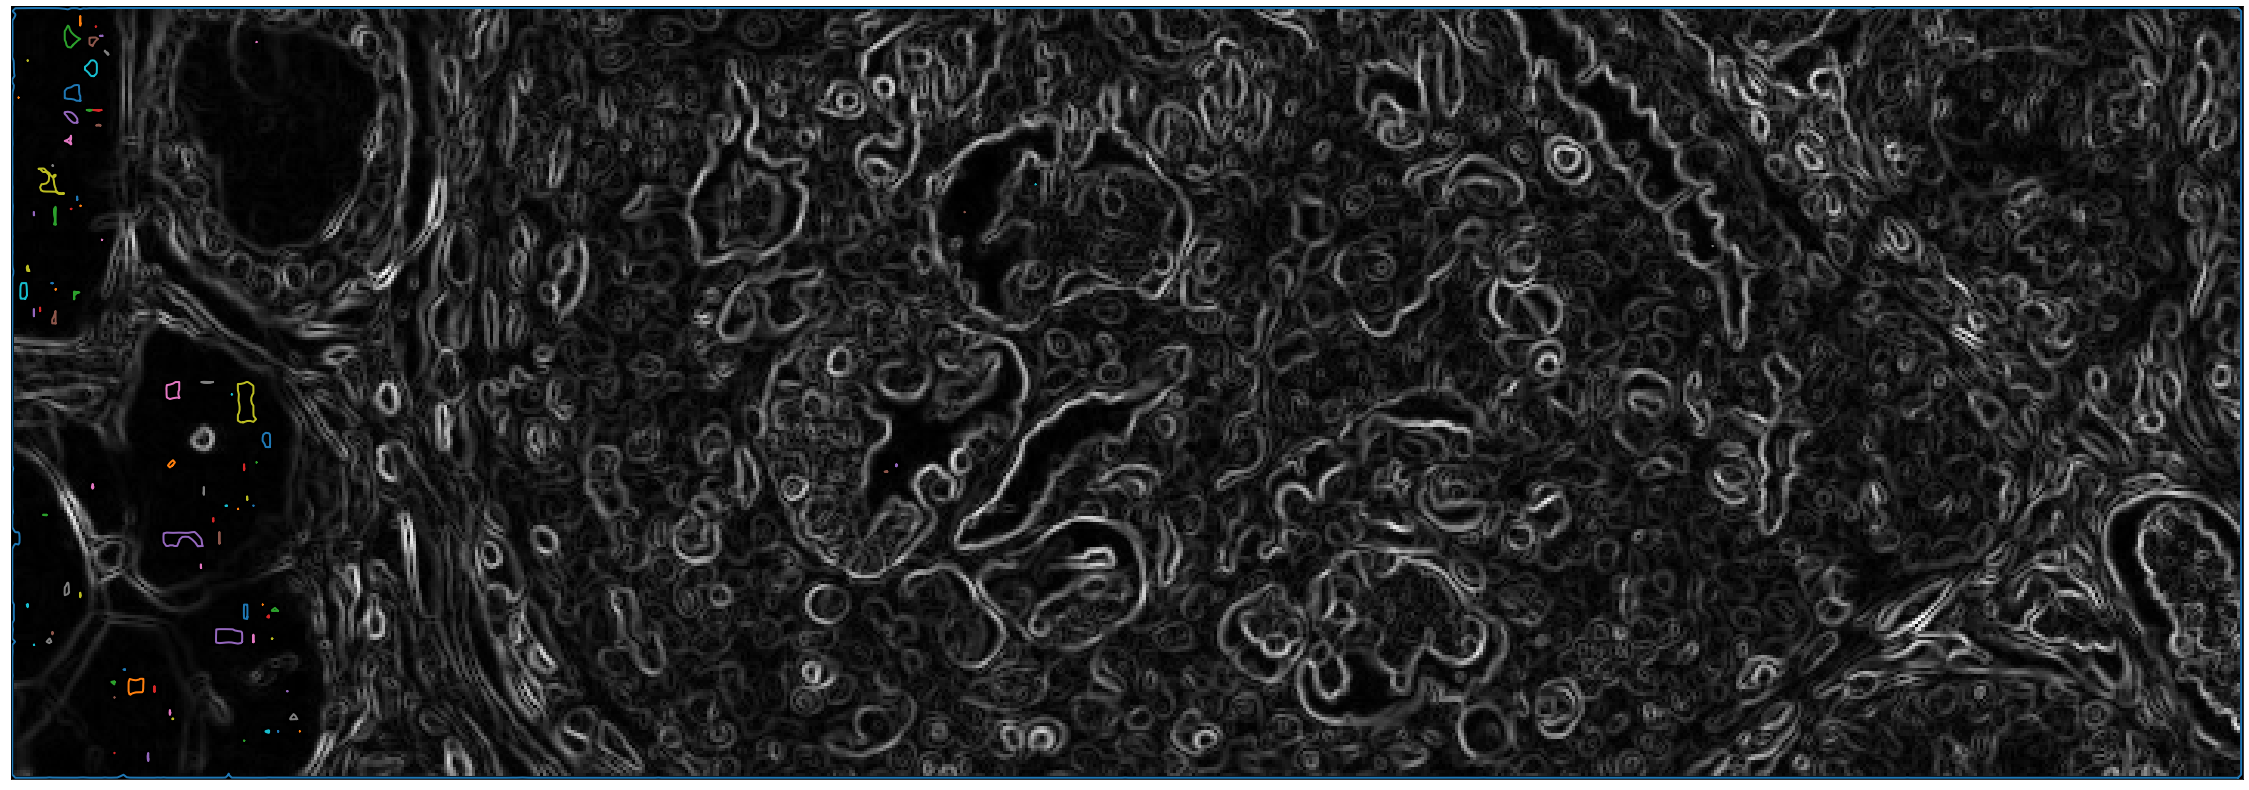

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
r=testim
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, .1)

# Display the image and plot all contours found
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
ax.imshow(r, cmap=plt.cm.gray)

i=0
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    i=n
print(n)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [0]:
from skimage import exposure
from skimage.filters import rank
import numpy as np
import matplotlib.pyplot as plt

from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram



noisy_image = img_as_ubyte(data.camera())

# equalize globally and locally
glob = exposure.equalize_hist(noisy_image) * 255
loc = rank.equalize(noisy_image, disk(20))

# extract histogram for each image
hist = np.histogram(noisy_image, bins=np.arange(0, 256))
glob_hist = np.histogram(glob, bins=np.arange(0, 256))
loc_hist = np.histogram(loc, bins=np.arange(0, 256))

from skimage.filters.rank import autolevel

noisy_image = img_as_ubyte(data.camera())

auto = autolevel(noisy_image.astype(np.uint16), disk(20))

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].imshow(noisy_image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(auto, cmap=plt.cm.gray)
ax[1].set_title('Local autolevel')

for a in ax:
    a.axis('off')

plt.tight_layout()


NameError: ignored

In [0]:
tmp=np.random.randint(600, size=(100,100))
tmp[tmp > 255] = 255
np.m(tmp)

200.101